# Урок 3. Основы дата-аналитики. Python. Pandas. Визуализация.

## Задачи
1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику. 
2. Какой клиент совершил больше всего успешных операций? (success == True)
3. С какой платформы осуществляется наибольшее количество успешных операций?
4. Какую платформу предпочитают премиумные клиенты?
5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
6. Постройте график распределения числа успешных операций
7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?
      
## Описание данных
user_data:

client – идентификатор пользователя \
premium – является ли клиент премиум \
age – возраст \

logs:

client – идентификатор  \
success – результат (успех - 1, нет - 0) \
platform – платформа \
time – время в формате Unix 

1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику.

Вопрос: Сколько уникальных значений принимает переменная platform?

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
user_data = pd.read_csv(r'C:\Users\teply\Documents\Studying\карпов\Новая папка\3_user_data.csv')
logs = pd.read_csv(r'C:\Users\teply\Documents\Studying\карпов\Новая папка\3_logs.csv')
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [3]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [4]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [5]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [6]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [7]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [8]:
logs.platform.nunique()

3

2. Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. Например:

12, 123, 456

In [9]:
success_number = logs.query('success == True') \
                         .groupby('client', as_index = False) \
                         .agg({'platform':'count'}) \
                         .rename(columns = {'platform':'success_number'}) \
                         .sort_values('success_number', ascending = False)
success_number

,client,success_number
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


In [10]:
maximum_success = success_number.success_number.max()

In [18]:
successful_clients = success_number.query('success_number == @maximum_success') \
                                   .sort_values('client') \
                                   .client \
                                   .tolist()

In [19]:
successful_clients

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [21]:
', '.join([str(client) for client in successful_clients])

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

3. С какой платформы осуществляется наибольшее количество успешных операций?

In [22]:
success_platform = logs.query('success == True') \
                       .groupby('platform', as_index = False) \
                       .agg({'client':'count'}) \
                       .rename(columns = {'client':'success_number'}) \
                       .sort_values('success_number', ascending = False)

In [23]:
success_platform

,platform,success_number
1,phone,2019
0,computer,1090
2,tablet,180


4. Какая платформа наиболее популярна среди премиумных клиентов?

In [31]:
user_platform = user_data.merge(logs, on='client', how='inner')
user_platform

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [35]:
premium_platform = user_platform.query('premium == True') \
                                .groupby('platform', as_index = False) \
                                .agg({'time':'count'}) \
                                .rename(columns = {'time':'number'}) \
                                .sort_values('number', ascending = False)
premium_platform

,platform,number
1,phone,246
0,computer,150
2,tablet,24


5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с исходными параметрами. Какой график получится в результате? Используйте датасэт, который вы получили на предыдущем шаге.

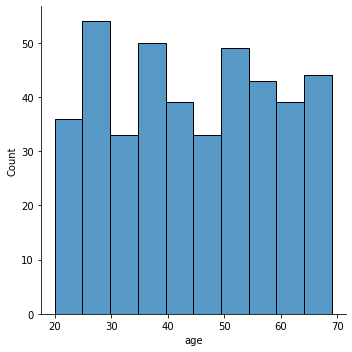

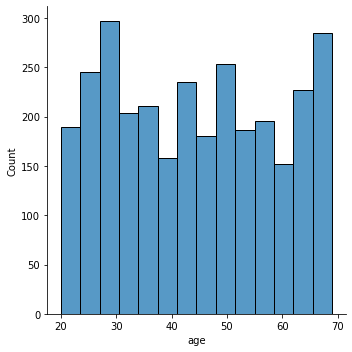

In [47]:
sns.displot(user_platform.query('premium == True').age)
sns.displot(user_platform.query('premium == False').age)

6. Постройте график распределения числа успешных операций: 
* x – число успешных операций
* y – число клиентов, совершивших столько успешных операций

In [49]:
client_vs_success_number = user_platform.groupby('client', as_index = False) \
                                        .agg({'success':'sum'})
client_vs_success_number

,client,success
0,40,1
1,75,1
2,81,1
3,132,1
4,164,1
...,...,...
2949,99926,1
2950,99927,1
2951,99931,1
2952,99952,0


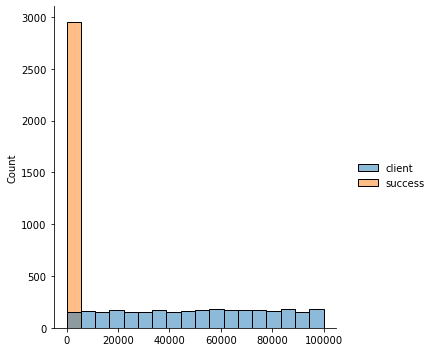

In [50]:
sns.displot(client_vs_success_number)

💀 Задание со звёздочкой! 💀

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

<AxesSubplot:xlabel='age', ylabel='success'>

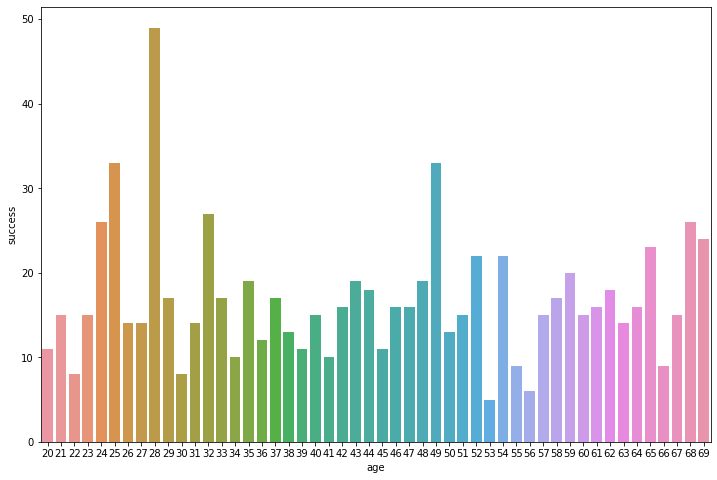

In [57]:
age_vs_success_number = user_platform.query('platform == "computer"') \
                               .groupby('age', as_index = False) \
                               .agg({'success' : 'sum'})
plt.figure(figsize=(12, 8))
sns.barplot(x=age_vs_success_number.age, y=age_vs_success_number.success)